In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import fileread as fr
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
import predefined as pd
import wave_ops as wo
import os
from scipy.optimize import curve_fit
import scipy


def gauss(x,*pars):
    a,mu,sigma=pars
    return a*np.exp(-1.*(x-mu)**2./(2.*sigma**2.))

[15037.0, 997.5, 10]
[  1.51594842e+04   9.97451545e+02   1.31700235e+01]
[11584.0, 992.5, 10]
[ 11516.70326227    994.82591842     17.31674776]


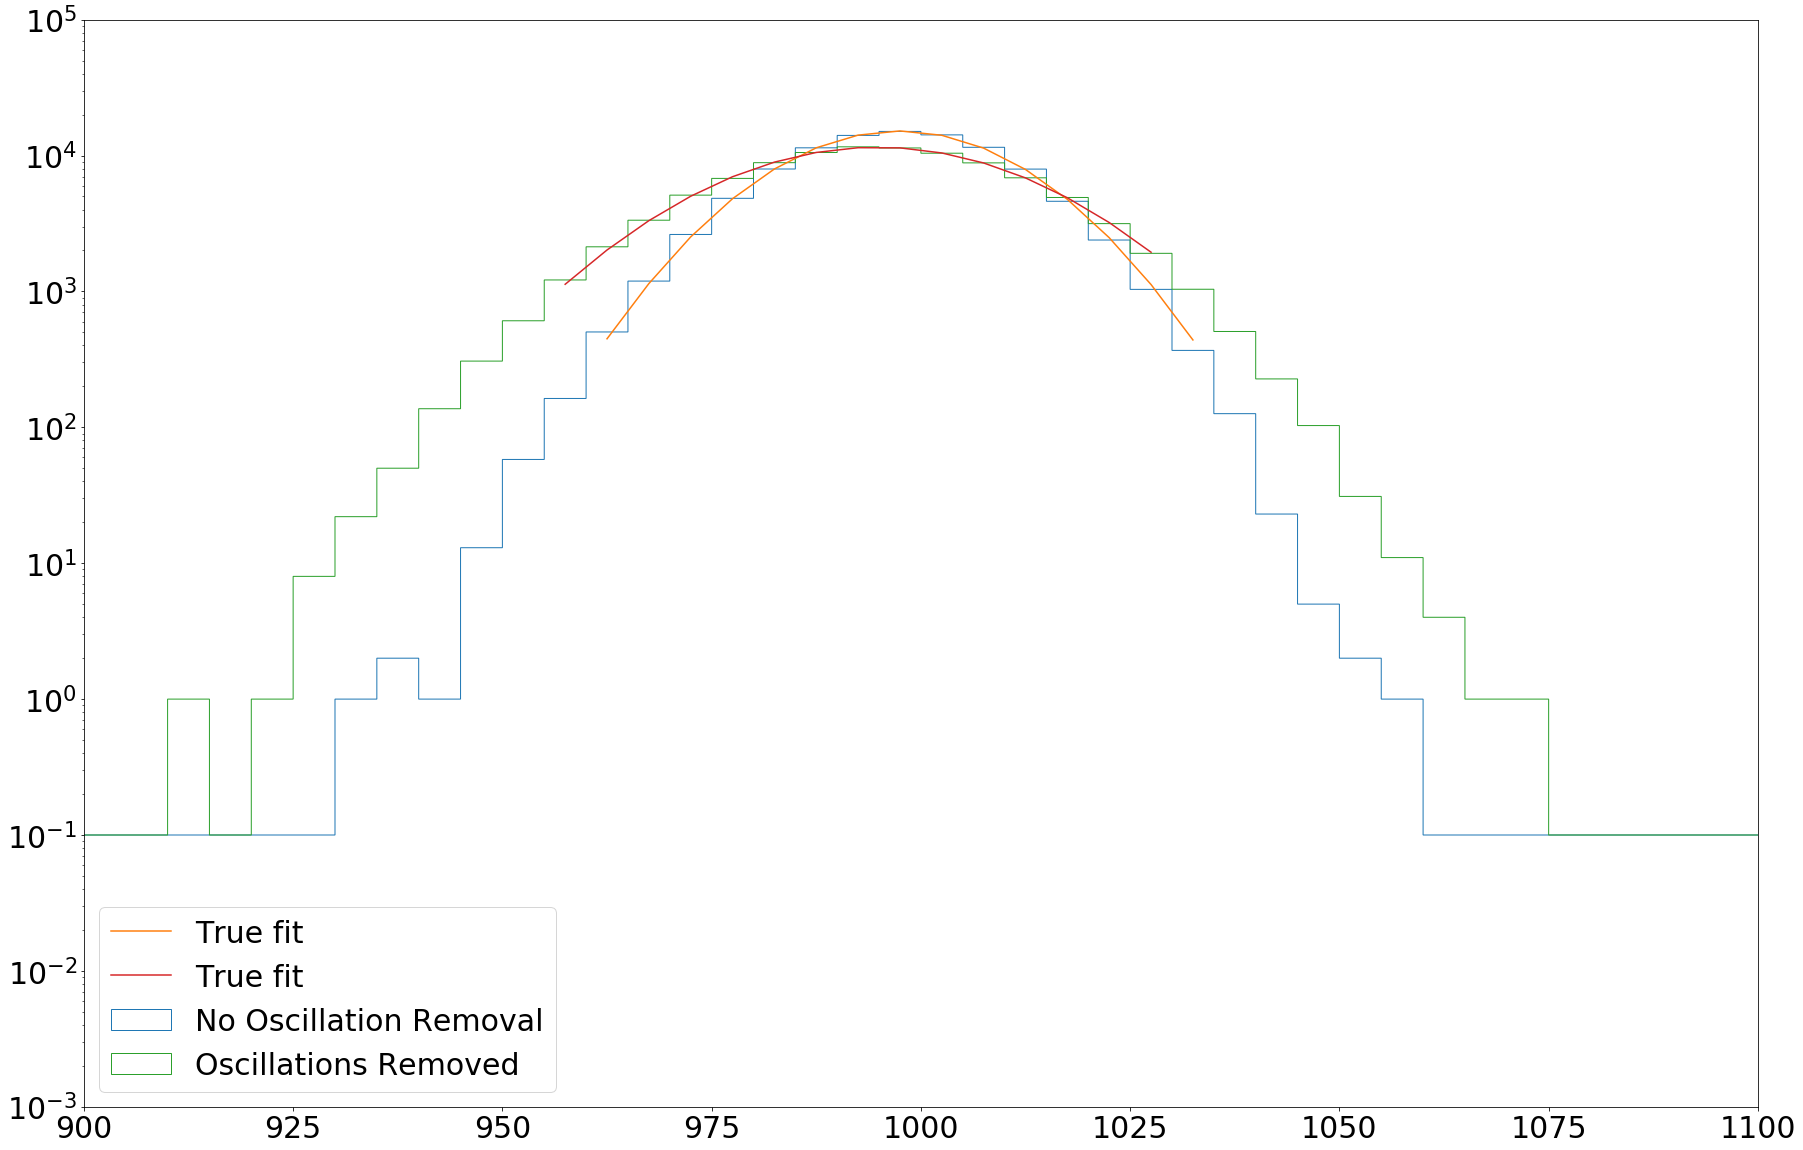

In [16]:
fs=30
d=[]
legend=[]
hists=[]
d.append(fr.gen_output('Run_0_0-std.bin')[0])
legend.append('No Oscillation Removal')
d.append(fr.gen_output('Run_0_0-no_osc.bin')[0])
legend.append('Oscillations Removed')

plt.figure(figsize=(30,20))
plt.tick_params(labelsize=fs)
for i in range(len(d)):
    hist,bins=plt.hist(d[i]['energy'],bins=1000,range=[0,5000],label=legend[i],\
                               histtype='step', align='mid',log='True')[0:2]
    bins=pd.cbins(bins)
    mx=np.amax(hist)
    loc=int(np.argmax(hist))
    beg,end=bins[loc]-40,bins[loc]+40
    fithist=hist[pd.land(bins>beg,bins<end)]
    fitbins=bins[pd.land(bins>beg,bins<end)]
    pars=[mx,bins[loc],10]
    print pars
    pars=curve_fit(gauss,xdata=fitbins,ydata=fithist,p0=pars,method='lm')[0]
    plt.plot(fitbins,gauss(fitbins,*pars),label='True fit')
    print( pars)
plt.xlim(900,1100)
plt.ylim(1E-3,1E5)
plt.legend(fontsize=fs)
plt.show()



In [12]:
print np.version.version,scipy.version.version

1.13.3 1.0.0
